Load up a test dataframe:

In [1]:
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
df = df.iloc[:10]

Set some sizes. Ideally these can be set automatically (along with the fontsize) and later use the textwrap library to handle long strings

In [2]:
figwidth = 400
figheight = 300
ncols = len(df.columns)
colwidth = figwidth/ncols
rowheight = figheight/ (len(df)+1) #plus one for the header row. 

These handle the `<text>`, `<line>` and `<rect>` elements. Together these can make any dataframe!

In [3]:
def gettxt(st, x, y, length, height, va='central', cl='normal'):
    
    """Adds a text element. x and y refer to the bottom left of the cell. 
    The actual x,y position of the text is inferred from the cell 
    type (i.e. is it a column header or not, and is it a string or number) """
    
    _y = y - height/2 #y alignment is always the same
    
    if cl == 'heavy': #it's a header cell
        _x = x + length/2
        ha = 'middle'
        
    else: #it's a value cell.
        if isinstance(st, str): #strings go in the middle of the cell
            _x = x + length/2
            ha = 'middle'
        else: #its a float.
            _x = x+length - length/10
            ha = 'end'
    
    ln = f"  <text x=\"{_x}\" y=\"{_y}\" text-anchor=\"{ha}\" class=\"{cl}\">{st}</text>  \n"
    return ln

def hline(x1,y1, x2, y2):
    vln = f"  <line x1=\"{x1}\" y1=\"{y1}\" x2=\"{x2}\" y2=\"{y2}\" style=\"stroke:rgb(0,0,0);stroke-width:0.5\" />"
    return vln

def hbox(nrow, rowheight, figwidth, ):
    hbox = f"""  <rect x="0" y="{(nrow+1)*rowheight}" width="{figwidth}" height="{rowheight}" style="fill:#eee;fill-opacity:0.8;stroke-width:0;stroke:rgb(0,0,0)" />\n"""
    return hbox
    
    

Open up an svg file and add the SVG header:

In [4]:
f = open('svg_directly.svg', 'w')
f.write(f"""<svg version="1.1"
     baseProfile="full"
     width="{figwidth}" height="{figheight}"
     xmlns="http://www.w3.org/2000/svg">
    <style>
     .normal {{ font: normal 12px sans-serif; fill: black; dominant-baseline: central; }}
     .heavy {{ font: bold 12px sans-serif; fill: black; dominant-baseline: central; }}
    </style>
   
""")

316

Write the dataframe column headers with `<text>` in bold and the horizontal line under the header:

In [5]:

for count, col in enumerate(df.columns):
    f.write( gettxt(col, count*colwidth, rowheight,colwidth, rowheight, cl='heavy') )
    
f.write( hline(0, rowheight, figwidth, rowheight) )
f.write('\n')

1

Write the table values and horizontal shaded boxes:

In [6]:

shaded = True
for rownum in range(df.shape[0]):
    row = df.iloc[rownum]
    if shaded:
        f.write(hbox(rownum, rowheight, figwidth))
    shaded = not shaded
    for count, value in enumerate(row):
        f.write( gettxt(value, (count)*colwidth, (rownum+2)*rowheight, colwidth, rowheight, cl='normal') )

Done. close file

In [7]:
f.write(""" </svg>""")
f.close()

# Now compare the pair:

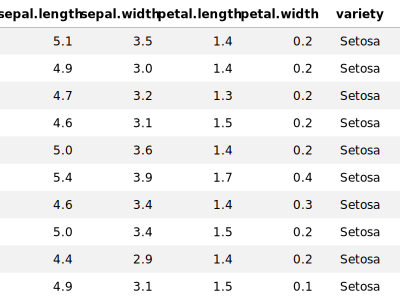

In [8]:
from IPython.display import SVG
s = open('svg_directly.svg').read()
SVG(s)

In [9]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa
